In [ ]:
import urllib.request
URL='@.com'
response = urllib.request.urlopen(URL)    
file = open("FILENAME.pdf", 'wb')
file.write(response.read())
file.close()


In [2]:
import pandas
from bs4 import BeautifulSoup as bs
import requests
import os

In [3]:
url="https://iprsearch.ipindia.gov.in"
response=requests.get("https://iprsearch.ipindia.gov.in/PublicSearch")


In [4]:
soup=  bs(response.text,'html.parser')
form= soup.find('form')
link=url+form.find('div',class_='col-lg-5').find('img').get('src')

In [5]:
link

'https://iprsearch.ipindia.gov.in/PublicSearch/Captcha/GetCaptchaImage'

In [6]:
def Create_Training_Dataset(link,folder_path='CapDataset'):
    start=int(input())
    end=int(input())
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    try:


        for i in range(start,end):
            response=requests.get(link)
            file_path=os.path.join(folder_path,f'{i+1}-image.jpg')

            with open(file_path,'wb') as f:
                f.write(response.content)
    except Exception as e:
        print('Failed to do so ')
    

In [14]:
Create_Training_Dataset(link)

In [1]:
import pytesseract
from PIL import Image

In [10]:
def image_to_text(image_path, spm_value, oem_value):
    # Open the image file
    img = Image.open(image_path)
    custom_config = r'--oem {0} --psm {1}'.format( oem_value, spm_value,)
    # Use pytesseract to do OCR on the image
    text = pytesseract.image_to_string(img,config=custom_config)  # English


    return text

In [7]:
image_path="/home/harsh/work_dir/Ipindia/CapDataset/0b0Fk4.jpg"
image_to_text(image_path)


TypeError: image_to_text() missing 2 required positional arguments: 'spm_value' and 'oem_value'

In [11]:
for i in range(5):
    print(image_to_text(image_path,spm_value=i,oem_value=3))

TesseractError: (1, 'Tesseract Open Source OCR Engine v4.1.1 with Leptonica Warning: Invalid resolution 0 dpi. Using 70 instead. Estimating resolution as 328 Too few characters. Skipping this page Warning. Invalid resolution 0 dpi. Using 70 instead. Too few characters. Skipping this page Error during processing.')

In [20]:
# pip install opencv-python
import cv2

In [6]:
from PIL import Image
import os
import pytesseract
import cv2 as cv
image_path="/home/harsh/work_dir/Ipindia/CapDataset/YJSTfn.jpg"
# output_path= "/home/harsh/work_dir/Ipindia"
# output_path=os.path.join(output_path,'dbnew')
# os.makedirs(output_path,exist_ok=True)
output_path="/home/harsh/work_dir/Ipindia/dbnew"
def image_to_text(image_path, psm_value, oem_value):
    # Open the image file
    img = Image.open(image_path)
    path="/home/harsh/work_dir/Ipindia/dbnew"

    
    

    # Convert the image to grayscale (black and white)
    bw_img = img.convert('L')
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Construct the custom configuration string
    custom_config = r"--oem {} --psm {} -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz".format(oem_value, psm_value )

    # Use pytesseract to do OCR on the image
    text = pytesseract.image_to_string(bw_img, config=custom_config)
    # bw_img.save(path)
    return text

# Example usage
image_path="/home/harsh/work_dir/Ipindia/CapDataset/YJSTfn.jpg"

for i in range(14):  # Adjust the range as needed
    for j in range(3):
        try:

            result_text = image_to_text(image_path, psm_value=i,oem_value=j)
            print(f"PSM={i} oem {2}, Text extracted from the image:")
            print(result_text)
        except Exception as e:
            pass
            # print(f"PSM={i} oem {j}, error in conversion.")
            
            # print("----")
    
        

PSM=1 oem 2, Text extracted from the image:
WISTIn

PSM=3 oem 2, Text extracted from the image:
WISTIn

PSM=4 oem 2, Text extracted from the image:
WISTIn

PSM=5 oem 2, Text extracted from the image:
E

PSM=6 oem 2, Text extracted from the image:
WISTIn

PSM=7 oem 2, Text extracted from the image:
WISTIn

PSM=8 oem 2, Text extracted from the image:
YISTIng

PSM=9 oem 2, Text extracted from the image:
YISTIng

PSM=10 oem 2, Text extracted from the image:
WISTIn

PSM=11 oem 2, Text extracted from the image:
YJISTEn

PSM=12 oem 2, Text extracted from the image:
YJISTEn

PSM=13 oem 2, Text extracted from the image:
YISTIng



In [11]:
import pandas as pd
pd.read_csv("data2.csv").columns

Index(['Unnamed: 0', 'Inventor_Name_1', 'Inventor_Name_2', 'Inventor_Name_3',
       'Inventor_Name_4', 'Inventor_Name_5', 'Inventor_Name_6',
       'Inventor_Name_7', 'Inventor_Name_8', 'Inventor_Name_9',
       'Inventor_Address_1', 'Inventor_Address_2', 'Inventor_Address_3',
       'Inventor_Address_4', 'Inventor_Address_5', 'Inventor_Address_6',
       'Inventor_Address_7', 'Inventor_Address_8', 'Inventor_Address_9',
       'Inventor_Country_1', 'Inventor_Country_2', 'Inventor_Country_3',
       'Inventor_Country_4', 'Inventor_Country_5', 'Inventor_Country_6',
       'Inventor_Country_7', 'Inventor_Country_8', 'Inventor_Country_9',
       'Inventor_Nationality_1', 'Inventor_Nationality_2',
       'Inventor_Nationality_3', 'Inventor_Nationality_4',
       'Inventor_Nationality_5', 'Inventor_Nationality_6',
       'Inventor_Nationality_7', 'Inventor_Nationality_8',
       'Inventor_Nationality_9', 'Invention Title', 'Publication Number',
       'Publication Date', 'Publication Type',

In [1]:
import cv2 
from matplotlib import pyplot as plt
img_file= "/home/harsh/work_dir/Ipindia/CapDataset/YJSTfn.jpg"
# img_file="/home/harsh/work_dir/Ipindia/CapDataset/0b0Fk4.jpg"
img= cv2.imread(img_file)


In [2]:
cv2.imshow("original img",img)
cv2.waitKey(0)

In [2]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

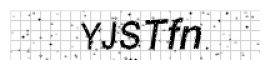

In [3]:
display(img_file)

In [9]:
import cv2

def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the image
image_path = "/home/harsh/work_dir/Ipindia/CapDataset/0b0Fk4.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = grayscale(image)

# Save the grayscale image
cv2.imwrite("temp/gray.jpg", gray_image)

# Apply thresholding
_, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)

# Save the binary image
cv2.imwrite("temp/bw_image.jpg", im_bw)


False

In [10]:
display("temp/bw_image.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'temp/bw_image.jpg'